In [1]:
import pandas as pd
import warnings

warnings.simplefilter("ignore")

In [2]:
# !git clone https://github.com/Ataullha/Demo-Dataset

# Dataset

In [3]:
df = pd.read_csv('/kaggle/input/k-means/income.csv')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# EDA

In [5]:
df.drop('Name',axis=1,inplace=True)

In [6]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [7]:
df.isnull().sum()

Age          0
Income($)    0
dtype: int64

# Preprocessing

In [8]:
# normalization
df = (df-df.min())/(df.max()-df.min())

# Visualization

In [9]:
import matplotlib.pyplot as plt

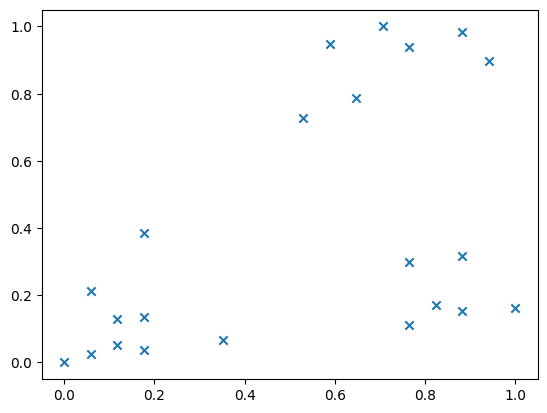

In [10]:
plt.scatter(df['Age'],df['Income($)'],marker='x')
plt.show()

# K-Means Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=3, random_state=81)

In [13]:
# km.fit(df)
# km.predict(df)

In [14]:
cluster_label = km.fit_predict(df)

In [15]:
df['cluster'] = cluster_label

In [16]:
df

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [17]:
df_0 = df[df['cluster']==0]
df_1 = df[df['cluster']==1]
df_2 = df[df['cluster']==2]

In [18]:
km_center = km.cluster_centers_

In [19]:
print(km_center[0])
print(km_center[1])
print(km_center[2])

print(km_center[:,0])
print(km_center[:,1])

[0.1372549  0.11633428]
[0.72268908 0.8974359 ]
[0.85294118 0.2022792 ]
[0.1372549  0.72268908 0.85294118]
[0.11633428 0.8974359  0.2022792 ]


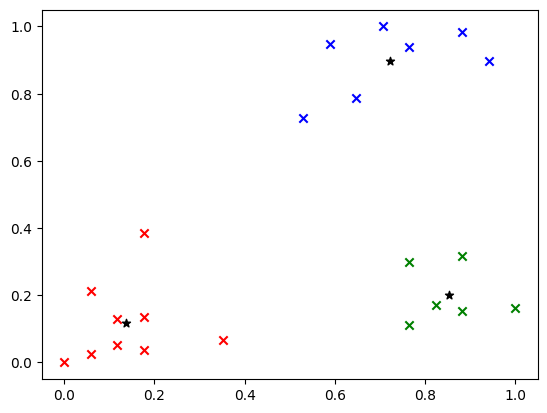

In [20]:
plt.scatter(df_0['Age'],df_0['Income($)'], marker='x', color='red')
plt.scatter(df_1['Age'],df_1['Income($)'], marker='x', color='blue')
plt.scatter(df_2['Age'],df_2['Income($)'], marker='x', color='green')
plt.scatter(km_center[:,0],km_center[:,1], marker='*', color='black')

[](http://)

In [21]:
km.inertia_ # k = 3

0.4750783498553094

# Elbow Method

In [22]:
sse = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [23]:
# sse

Text(0.5, 1.0, 'Elbow Method Plotting')

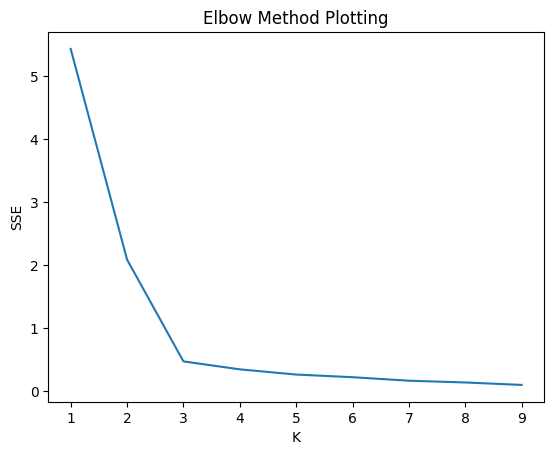

In [24]:
# plot the elbow
plt.plot(range(1,10), sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method Plotting')

In [25]:
1

1